In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
url = 'https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'

In [4]:
df = pd.read_csv(url, header=None)

In [5]:
df.columns=['Size', 'Bedrooms', 'Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
df.dtypes

Size        int64
Bedrooms    int64
Price       int64
dtype: object

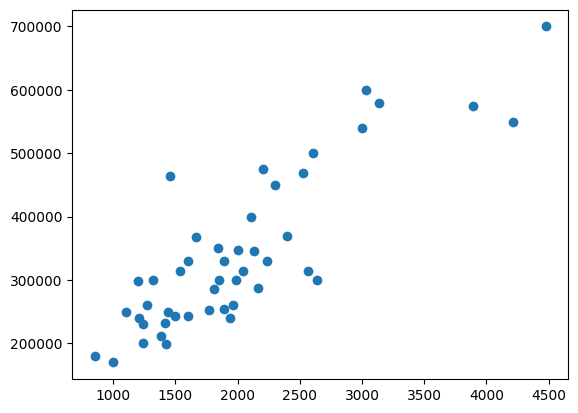

In [7]:
plt.plot(df.Size, df.Price, 'o')
plt.show()

In [8]:
random_params = 1000+df['Size']*220
## przy *180 wyglada nieźle

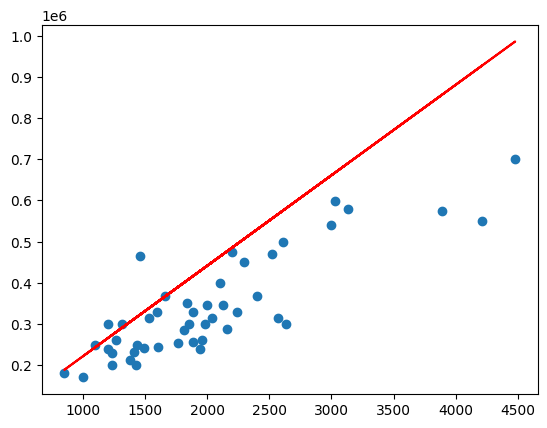

In [9]:
plt.plot(df.Size,df.Price,'o')
plt.plot(df.Size, random_params ,'r')

In [10]:
# gradient 

# przyporządkowanie zmiennej i niezależnej 

X = df['Size'].values
y= df['Price'].values

X=np.column_stack(([1]*len(X), X)) # dodanie kolumny z jedynkami - technikalia

In [11]:
def gradientDescent(X, y, theta, alpha, m, numIterations):
    '''
    param: X - zmienne niezalezne
    para: Y - zmienna zalezna 
    param theta - macier [Theta_0 czyli punkt przeciecia/wyraz woln, 
                          Theta_1 czyli współczynnik od X1]
    param alpha - współczynnik uczenia - wielkość kroku 
    param: numIterations - liczba iteracji naszego modelu, czyli ile kroków zrobić
    '''
    
    #potrzebne do obliczenia gradientów 
    xTrans = X.transpose() 
    
    #pusta macierz, do której będą zapisywane wartości funkcji kosztu po każdej iteracji
    cost_array = np.empty([numIterations, 2]) 
    
    #petla
    for i in range(0, numIterations):
        
        #bierzemy kazdy x, mnozymy przez theta_1 i dodajemy theta_0 - przewiduje cene domu
        hypotesis=np.dot(X, theta)    
        
        
        #odległość kropek od linii, innymi słowy reszty/ różnice
        loss=hypotesis-y
        
        #wartość funkcji kosztu        
        cost = np.sum(loss**2)/(2*m)
        
        print(f'Iteration {i} | Cost {cost}')
        cost_array[i][0] = i
        cost_array[i][1] = cost
        
        #pochodna czastkowa funkcji
        gradient = np.dot(xTrans, loss)/m
        
        theta=theta-alpha*gradient
    return theta,cost_array
        

In [12]:
m=len(X)
numIterations=100
alpha=0.0000005
theta=[10000,200] #theta0, theta1
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 5813726085.180851
Iteration 1 | Cost 8327158035.676536
Iteration 2 | Cost 12643222521.220034
Iteration 3 | Cost 20054766961.98894
Iteration 4 | Cost 32781868493.237206
Iteration 5 | Cost 54636842790.85527
Iteration 6 | Cost 92166196992.74808
Iteration 7 | Cost 156611590853.81818
Iteration 8 | Cost 267277198551.66187
Iteration 9 | Cost 457312141195.06
Iteration 10 | Cost 783640077893.9642
Iteration 11 | Cost 1344010296052.7905
Iteration 12 | Cost 2306277837625.4497
Iteration 13 | Cost 3958683321623.1045
Iteration 14 | Cost 6796193437641.846
Iteration 15 | Cost 11668764810983.74
Iteration 16 | Cost 20035942659700.55
Iteration 17 | Cost 34404057518930.72
Iteration 18 | Cost 59076979302175.266
Iteration 19 | Cost 101445311911291.89
Iteration 20 | Cost 174200197767386.4
Iteration 21 | Cost 299134862172698.6
Iteration 22 | Cost 513672623951885.0
Iteration 23 | Cost 882076793029427.9
Iteration 24 | Cost 1514700302607211.5
Iteration 25 | Cost 2601041170770041.0
Iteration 26 

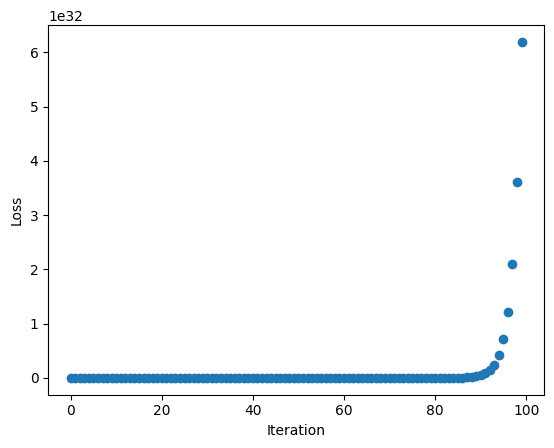

In [13]:
epoch=range(len(cost_array[:,0]))
plt.plot(epoch,cost_array[:,1],'o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [14]:
theta

array([9.28891771e+09, 2.14539667e+13])

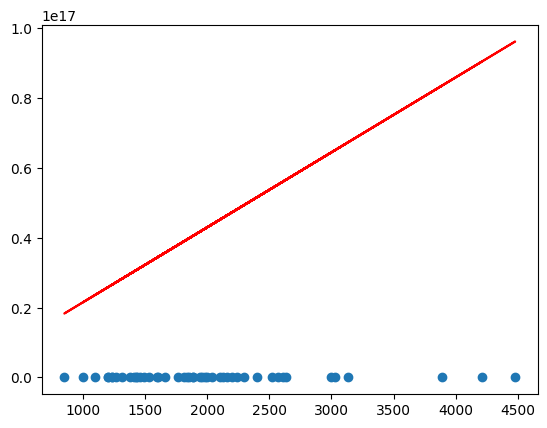

In [15]:
plt.plot(df['Size'], df['Price'], 'o')
plt.plot(df['Size'], theta[0]+df['Size']*theta[1], 'r')
plt.show()

Regresja jednej zmiennej

In [16]:
X = df[['Size']]
y = df[['Price']]

X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [17]:
y.values[:5]

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900]])

In [18]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
#theta 0, wyraz wolny
model.intercept_

array([71270.49244873])

In [20]:
#theta 1
model.coef_

array([[134.52528772]])

In [21]:
predict_data = np.array([ [3200], [3720]])
predict_data

array([[3200],
       [3720]])

In [22]:
model.predict(predict_data)

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[501751.4131535 ],
       [571704.56276803]])

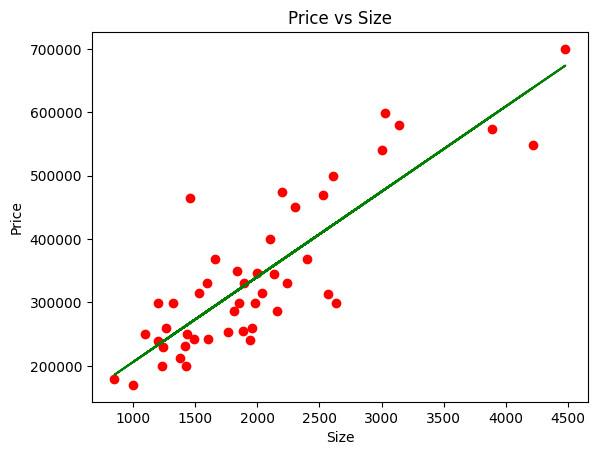

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color = 'red')
plt.plot(X, model.predict(X), color = 'green')
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [24]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [26]:
# x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
# y_range=model.predict(x_range.reshape(-1,1))

# fig=px.scatter(x=X['Size'],y=y,opacity=0.65)
# fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Regression Fit'))
# fig.show()

Regresja wielu zmiennych

In [27]:
X = df[['Size', 'Bedrooms']]
y = df['Price']

In [28]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [29]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [30]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [31]:
model.intercept_

89597.90954279734

In [32]:
model.coef_

array([  139.21067402, -8738.01911233])

In [33]:
predict_data = np.array([ [3200, 3], [3720, 2], [5000, 6] ])

In [34]:
model.predict(predict_data)

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([508858.00906222, 589985.57866371, 733223.16495696])

## Nowy model regresji

source: https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv
Zadania regrasja liniowa jednej oraz wielu zmiennych

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'

In [36]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
df_to_model = df[['cnt', 'atemp', 'windspeed', 'hum', 'workingday']]
df_to_model

,cnt,atemp,windspeed,hum,workingday
0,985,0.363625,0.160446,0.805833,0
1,801,0.353739,0.248539,0.696087,0
2,1349,0.189405,0.248309,0.437273,1
3,1562,0.212122,0.160296,0.590435,1
4,1600,0.229270,0.186900,0.436957,1
...,...,...,...,...,...
726,2114,0.226642,0.350133,0.652917,1
727,3095,0.255046,0.155471,0.590000,1
728,1341,0.242400,0.124383,0.752917,0
729,1796,0.231700,0.350754,0.483333,0


In [38]:
#atemp (0, 1) - temperatura odczuwalna, wedlug dokumentacji zmienna zostala znormalizowana i wystandaryzowana przyjmjuje wartosci 0 do 1
#cnt - ilość wypożyczonych rowerów danego dnia

In [39]:
df_to_model.dtypes

cnt             int64
atemp         float64
windspeed     float64
hum           float64
workingday      int64
dtype: object

In [40]:
# przypisz jako zmienne zależną i opisywaną

In [41]:
X = df_to_model['atemp','windspeed', 'hum', 'workingday'].values
y = df_to_model['cnt'].values

KeyError: ('atemp', 'windspeed', 'hum', 'workingday')

In [42]:
X.shape

(47, 2)

In [43]:
y.shape

(47,)

In [44]:
# Wykres zależności 

In [45]:
m =len(X)
numIterations = 1000
alpha = 0.05
theta = [1000,200] #theta0, theta1
theta, cost_array= gradientDescent( X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 1612912575736.2446
Iteration 1 | Cost 8.596965970010276e+22
Iteration 2 | Cost 4.589071612261628e+33
Iteration 3 | Cost 2.4496523931734202e+44
Iteration 4 | Cost 1.307627632427138e+55
Iteration 5 | Cost 6.980133303206803e+65
Iteration 6 | Cost 3.726004232573567e+76
Iteration 7 | Cost 1.9889459037663346e+87
Iteration 8 | Cost 1.0617019093873972e+98
Iteration 9 | Cost 5.667378596181627e+108
Iteration 10 | Cost 3.025254063166416e+119
Iteration 11 | Cost 1.6148845522462774e+130
Iteration 12 | Cost 8.620274736046878e+140
Iteration 13 | Cost 4.601513861877325e+151
Iteration 14 | Cost 2.45629408219525e+162
Iteration 15 | Cost 1.31117297466228e+173
Iteration 16 | Cost 6.999058386153271e+183
Iteration 17 | Cost 3.7361064664561146e+194
Iteration 18 | Cost 1.9943384893474042e+205
Iteration 19 | Cost 1.0645804785818205e+216
Iteration 20 | Cost 5.682744435967594e+226
Iteration 21 | Cost 3.0334563684222825e+237
Iteration 22 | Cost 1.6192629534562066e+248
Iteration 23 | Cost 8.6436

/var/folders/ms/wkr5qnw531n49nj670qhvllh0000gn/T/ipykernel_55880/3417941855.py:37: RuntimeWarning: invalid value encountered in subtract
  theta=theta-alpha*gradient


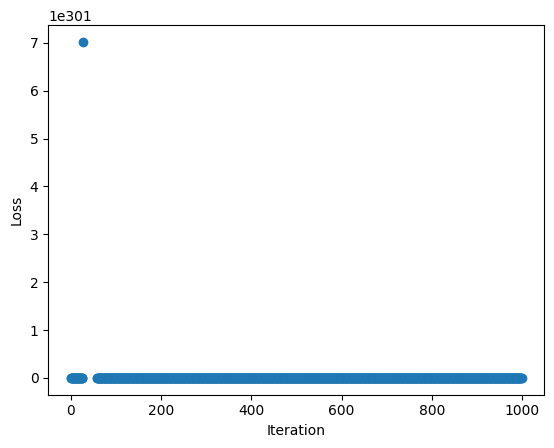

In [46]:
epoch=range(len(cost_array[:,0]))
plt.plot(epoch,cost_array[:,1],'o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

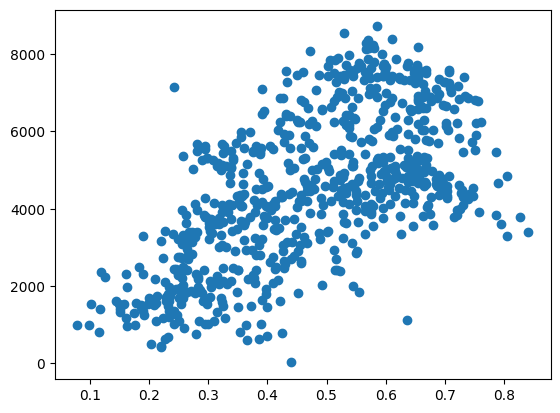

In [47]:
plt.plot(df['atemp'],df['cnt'],'o')
plt.plot(df['atemp'],theta[0]+df["atemp"]*theta[1],'r')
plt.show()

In [48]:
from sklearn.metrics import r2_score

# ... wczytanie danych, preprocessing, trenowanie modelu itd.

# wykonanie predykcji dla danych uczących
y_pred = np.dot(X, theta)

# obliczenie r-squared dla danych uczących
r_squared = r2_score(y, y_pred)
print("R-squared dla danych uczących:", r_squared)

ValueError: Input contains NaN.

In [ ]:
corr = df.corr(numeric_only=True)
corr = corr.round(2)

# now let's generate the correlogram
corr.style.background_gradient(cmap='coolwarm')

In [49]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [50]:
df_new = df[['atemp', 'hum', 'windspeed', 'workingday','cnt']]
X = df[['atemp', 'hum', 'windspeed', 'workingday']]
y = df['cnt']

In [51]:
from sklearn.linear_model import LinearRegression

# Tworzenie i trenowanie modelu
model = LinearRegression()
model.fit(X, y)

print('model.intercept_:', model.intercept_)

print('model.coef_:', model.coef_)

# Wykonanie predykcji na danych testowych
y_pred = model.predict(X)

# Obliczenie R-kwadrat
r_squared = model.score(X, y)
print("R-kwadrat:", r_squared)

model.intercept_: 3698.4373927964934
model.coef_: [ 7486.28341042 -3174.17132979 -4407.19069508   127.65517425]
R-kwadrat: 0.46413674348918577


### y = 3698 + 7486*atemp - 3174*hum -4407*windspeed + 127*workingday

In [54]:
#zinterpretuj współczynniki modelu
#3698 - w dniu z temperaturą znormalizowaną 0, wilgotnością znormalizowaną 0, wiatrem znormalizowanym 0 i w dniu niepracującym tyle będzie
#wypożyczeń rowerów 
#7486*atemp - wraz ze wzrostem atemp o jednostkę liczba wypożyczeń rowerów rośnie o 7486
#-3174*hum - wraz ze wzrostem hum o jednostkę liczba wypożyczeń rowerów spada o 3174
#-4407*windspeed - wraz ze wzrostem windspeed o jednostkę liczba wypożyczeń rowerów spada o 4407
#127*workingday (zmienna binarna) - w dniu pracującym liczba wypożyczeń rowerów w stosunku do dnia wolnego wzrasta o 127

Stwórz predykcję wypożyczonych rowerów gdzie temp=0.5, wilgotn=0.3 windspee=0.25 i dzień jest pracujący

In [62]:
model.predict([[0.5, 0.3, 0.25, 1]])

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5515.18519955])

## Regresja wielomianowa

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [161]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [162]:
X = df[['Size']]
y = df['Price']

In [163]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [164]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [165]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly[:5]

array([[1.00000000e+00, 2.10400000e+03, 4.42681600e+06, 9.31402086e+09],
       [1.00000000e+00, 1.60000000e+03, 2.56000000e+06, 4.09600000e+09],
       [1.00000000e+00, 2.40000000e+03, 5.76000000e+06, 1.38240000e+10],
       [1.00000000e+00, 1.41600000e+03, 2.00505600e+06, 2.83915930e+09],
       [1.00000000e+00, 3.00000000e+03, 9.00000000e+06, 2.70000000e+10]])

In [166]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [167]:
model.intercept_

236407.03612922167

In [168]:
model.coef_

array([ 0.00000000e+00, -1.07855433e+02,  1.06190390e-01, -1.38299983e-05])

In [169]:
predict_data = np.array([[3200], [3720]])

In [170]:
predict_data_poly = poly.transform(predict_data)
predict_data_poly

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([[1.0000000e+00, 3.2000000e+03, 1.0240000e+07, 3.2768000e+10],
       [1.0000000e+00, 3.7200000e+03, 1.3838400e+07, 5.1478848e+10]])

In [171]:
model.predict(predict_data_poly)

array([525477.8631757 , 592737.54278301])

In [172]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
y_range=model.predict(poly.fit_transform(x_range.reshape(-1,1)))

fig=px.scatter(x=X['Size'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Polynomial Regression Fit'))
fig.show()

In [ ]:
# wracamy do zbioru z wypożyczeniami rowerów,
# Zmienna zależna = cnt
# Zmienna niezależna =  atemp

# formatujemy atemp na 2 stopnie potęgi

# trenujemy model na podstawie rozszerzonego zbioru (atemp i jej potęgi)

# stworzym predykcję ilości 

In [122]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [182]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [183]:
X = df[['atemp']]
y = df['cnt']

In [184]:
poly = PolynomialFeatures(degree=2)

In [185]:
X_poly = poly.fit_transform(X)

In [186]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [187]:
model.coef_

array([     0.        ,  22767.32495365, -16460.45125404])

In [188]:
model.intercept_

-2155.0968932330425

In [189]:
predict_data = np.array([[0.8]])
predict_data_poly = poly.transform(predict_data)
predict_data_poly

/Users/mateusz/Documents/Code/data-science-bootcamp/final-venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([[1.  , 0.8 , 0.64]])

In [190]:
model.predict(predict_data_poly)

array([5524.0742671])

In [191]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['atemp'].min(),X['atemp'].max(),50)
y_range=model.predict(poly.fit_transform(x_range.reshape(-1,1)))

fig=px.scatter(x=X['atemp'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Polynomial Regression Fit'))
fig.show()